In [248]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [249]:
df.shape

(816, 7)

In [250]:
# Load the dataset
df = pd.read_excel("quikr_car.xlsx")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Problems to sort out

- names are not consistent
- names include company names
- some names are spam, like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company has values that are not company names, like 'Used', 'URJENT', etc.
- year has some values that are not valid years
- year is stored as object, should be changed to integer
- Price has 'Ask for Price' instead of a number
- Price has commas and is stored as object
- kms_driven is stored as object and includes 'kms' at the end
- kms_driven has missing values and two rows have 'Petrol' in it
- fuel_type has missing values

# Cleaning the data👇
## Shown the before and after data set

In [252]:
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [253]:
# Clean name
df['name'] = df['name'].str.split().str[:3].str.join(' ')

In [254]:
# Clean company column
invalid_companies = ['Used', 'URJENT', 'Urgent', 'Showroom', 'Contact']
df = df[df['company'].astype(str).str.contains('|'.join(invalid_companies), case=False) == False]

In [255]:
df['name'].unique()

array(['Hyundai Santro Xing', 'Mahindra Jeep CL550', 'Maruti Suzuki Alto',
       'Hyundai Grand i10', 'Ford EcoSport Titanium', 'Ford Figo',
       'Hyundai Eon', 'Ford EcoSport Ambiente', 'Skoda Fabia Classic',
       'Maruti Suzuki Stingray', 'Hyundai Elite i20',
       'Mahindra Scorpio SLE', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Hyundai i20 Sportz',
       'Maruti Suzuki Vitara', 'Mahindra Bolero DI',
       'Maruti Suzuki Swift', 'Maruti Suzuki Wagon', 'Toyota Innova 2.0',
       'Renault Lodgy 85', 'Skoda Yeti Ambition', 'Maruti Suzuki Baleno',
       'Renault Duster 110', 'Renault Duster 85', 'Honda City 1.5',
       'Maruti Suzuki Dzire', 'Honda Amaze', 'Honda Amaze 1.5',
       'Honda City', 'Datsun Redi GO', 'Maruti Suzuki SX4',
       'Mitsubishi Pajero Sport', 'Honda City ZX', 'Tata Indigo eCS',
       'Volkswagen Polo Highline', 'I want to', 'Chevrolet Spark LS',
       'Renault Duster 110PS', 'Mini Cooper S', 'Skoda Fabia 1.2L',
       'Renault Duster', '

In [256]:
df['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, '...', '150k', 'TOUR', 2003, 'r 15',
       2004, 'Zest', '/-Rs', 'sale', 1995, 'ara)', 2002, 2001, 'tion',
       'odel', '2 bs', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'zire', 'cent', 'cab', 't xe', 'EV2',
       'r...', 'zest'], dtype=object)

In [257]:
# Clean 'year'
df = df[df['year'].notnull()]
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])

In [258]:
df['year'].unique()

array([2007., 2006., 2018., 2014., 2015., 2012., 2013., 2016., 2010.,
       2017., 2008., 2011., 2019., 2009., 2005., 2000., 2003., 2004.,
       1995., 2002., 2001.])

In [259]:
df['Price'].unique()

array([80000, '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', 75000, '1,00,000', '2,90,000',
       95000, '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000', 85000,
       '2,00,000', '5,70,000', '1,10,000', '4,48,999', '18,91,111',
       '1,59,500', '3,44,999', '4,49,999', '8,65,000', '6,99,000',
       '3,75,000', '2,24,999', '12,00,000', '1,95,000', '3,51,000',
       '2,40,000', 90000, '1,55,000', '6,00,000', '1,89,500', '2,10,000',
       '3,90,000', '1,35,000', '16,00,000', '7,01,000', '2,65,000',
       '5,25,000', '3,72,000', '6,35,000', '5,50,000', '4,85,000',
       '3,29,500', '2,51,111'

In [260]:
# Clean price column
df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)

In [261]:
df['Price'].unique()

array([  80000.,  425000.,  325000.,  575000.,  175000.,  190000.,
        830000.,  250000.,  182000.,  315000.,  415000.,  320000.,
       1000000.,  500000.,  350000.,  160000.,  310000.,   75000.,
        100000.,  290000.,   95000.,  180000.,  385000.,  105000.,
        650000.,  689999.,  448000.,  549000.,  501000.,  489999.,
        280000.,  349999.,  284999.,  345000.,  499999.,  235000.,
        249999., 1475000.,  395000.,  220000.,  170000.,   85000.,
        200000.,  570000.,  110000.,  448999., 1891111.,  159500.,
        344999.,  449999.,  865000.,  699000.,  375000.,  224999.,
       1200000.,  195000.,  351000.,  240000.,   90000.,  155000.,
        600000.,  189500.,  210000.,  390000.,  135000., 1600000.,
        701000.,  265000.,  525000.,  372000.,  635000.,  550000.,
        485000.,  329500.,  251111.,  569999.,   69999.,  299999.,
        399999.,  450000.,  270000.,  158400.,  179000.,  125000.,
        299000.,  150000.,  275000.,  285000.,  340000.,   700

In [262]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [263]:
# Clean 'kms_driven'
df = df[df['kms_driven'].notnull()]
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.extract('(\d+)')
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')
df = df.dropna(subset=['kms_driven'])

In [264]:
df['kms_driven'].unique()

array([4.50000e+04, 4.00000e+01, 2.80000e+04, 3.60000e+04, 4.10000e+04,
       2.50000e+04, 2.45300e+04, 6.00000e+04, 3.00000e+04, 3.20000e+04,
       4.86600e+04, 4.00000e+03, 1.69340e+04, 4.30000e+04, 3.55500e+04,
       3.95220e+04, 3.90000e+04, 5.50000e+04, 7.20000e+04, 1.59750e+04,
       7.00000e+04, 2.34520e+04, 3.55220e+04, 4.85080e+04, 1.54870e+04,
       8.20000e+04, 2.00000e+04, 6.80000e+04, 3.80000e+04, 2.70000e+04,
       3.30000e+04, 4.60000e+04, 1.60000e+04, 4.70000e+04, 3.50000e+04,
       3.08740e+04, 1.50000e+04, 2.96850e+04, 1.30000e+05, 1.90000e+04,
       5.40000e+04, 1.30000e+04, 3.82000e+04, 2.20000e+04, 5.00000e+04,
       1.35000e+04, 3.60000e+03, 4.58630e+04, 6.05000e+04, 1.25000e+04,
       1.80000e+04, 1.33490e+04, 2.90000e+04, 4.40000e+04, 4.20000e+04,
       1.40000e+04, 4.90000e+04, 3.62000e+04, 5.10000e+04, 1.04000e+05,
       3.33330e+04, 3.36000e+04, 5.60000e+03, 7.50000e+03, 2.60000e+04,
       2.43300e+04, 6.54800e+04, 2.00000e+05, 5.90000e+04, 9.900

In [265]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [266]:
# Clean 'fuel'
df = df[df['fuel_type'].notnull()]

In [267]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

## EDA (Exploratory Data Analysis)

### 1. Price distribution

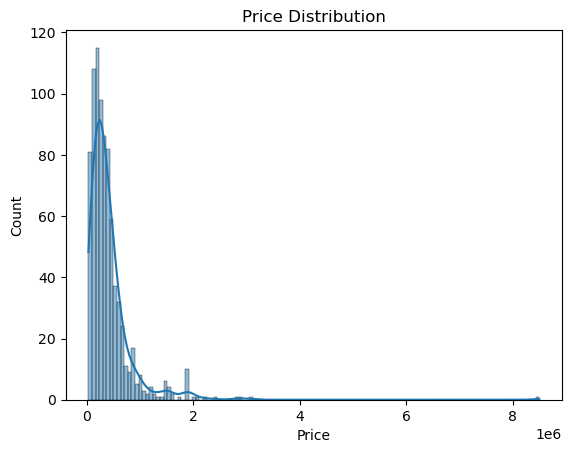

In [268]:
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

### 2. Fuel type count

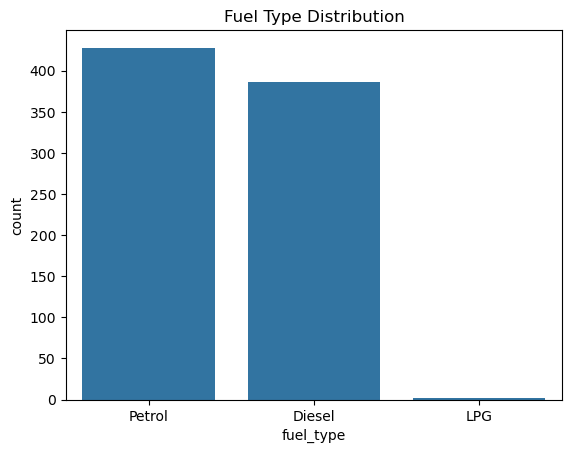

In [269]:
sns.countplot(data=df, x='fuel_type')
plt.title("Fuel Type Distribution")
plt.show()

### 4. Year vs. Price scatter

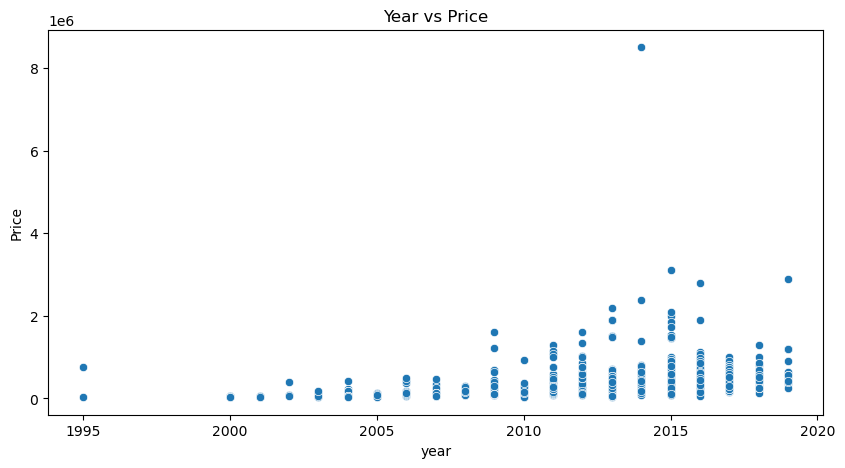

In [270]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='year', y='Price', data=df)
plt.title("Year vs Price")
plt.show()

# Saving the sorted dataset to a new csv file 📥

In [271]:
# Extract company and model
df['company'] = df['name'].str.split(' ').str[0]
df['model'] = df['name'].str.split(' ').str[1]
df = df.dropna(subset=['company', 'model'])

In [272]:
# Final dataframe
final_df = df[['company', 'model', 'year', 'kms_driven', 'fuel_type', 'Price']]

In [273]:
final_df.to_csv("cleaned_car_data.csv", index=False)
print("✅ Cleaned data saved to cleaned_car_data.csv")

✅ Cleaned data saved to cleaned_car_data.csv


# Training the Model
### using One-hot encoding

In [274]:
# One-hot encoding
X = pd.get_dummies(final_df.drop('Price', axis=1))
y = final_df['Price']

In [275]:
# Clean full target column before split
y = y.astype(str).str.replace(',', '').astype(float)

# Then split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [276]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [277]:
# Save model and columns
joblib.dump(model, 'car_price_predictor.pkl')
joblib.dump(X.columns, 'model_columns.pkl')

print("✅ Model and features saved successfully.")

✅ Model and features saved successfully.


In [278]:
model = joblib.load('car_price_predictor.pkl')
model_columns = joblib.load('model_columns.pkl')

In [279]:
# Example
test_data = {
    'company': ['Maruti'],
    'model': ['Swift'],
    'year': [2018],
    'kms_driven': [42000],
    'fuel': ['Diesel']
}

test_df = pd.DataFrame(test_data)

In [280]:
# One-hot encode the test input
test_encoded = pd.get_dummies(test_df)

In [281]:
# Align with model's columns (add missing columns with 0)
for col in model_columns:
    if col not in test_encoded.columns:
        test_encoded[col] = 0

In [282]:
# Reorder columns to match training data
test_encoded = test_encoded[model_columns]

In [283]:
# -------------- Prediction --------------
predicted_price = model.predict(test_encoded)[0]
print(f"🚗 Predicted Price: ₹{int(predicted_price):,}")

🚗 Predicted Price: ₹-42,701,286,710,701
